# Exploring Imageability and Concreteness as possible metrics

In [2]:
import nltk
import pandas as pd
from nltk.corpus import brown
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

## Concreteness
Measuring concreteness across the whole text

In [95]:
from typing import Any, Optional

concreteness_df = pd.read_csv('data/concreteness.txt', sep="\t")
# concreteness_df.set_index("Word", inplace=True)
# concreteness_df.sort_index(inplace=True)

words_df = brown.words()[:1000]

def concreteness(word: str, concreteness_df: pd.DataFrame = concreteness_df, pos: Optional[str] = None) -> float | None | Any:
    """Returns the mean concreteness rating for a given word, according to the table of ~40,000 words and word definitions, as defined by Brysbaert et al (2013)."""
    # TODO: Possibly look at amortized values given standard deviations
    try:
        # return concreteness_df.loc[word.lower(), "Conc.M"]
        return concreteness_df.loc[word.lower(),"Conc.M"]
    except:
        return None

print(concreteness("the", concreteness_df))


None


In [96]:
kv = dict(zip(concreteness_df["Word"], concreteness_df["Conc.M"]))
kv["the"]

1.43

In [99]:
%%timeit -n 10
# listt = list(map(lambda x: concreteness(x), words_df))
listt = list(kv.get(word.lower(), None) for word in words_df)
listt = [item for item in listt if item]

3.2 ms ± 109 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


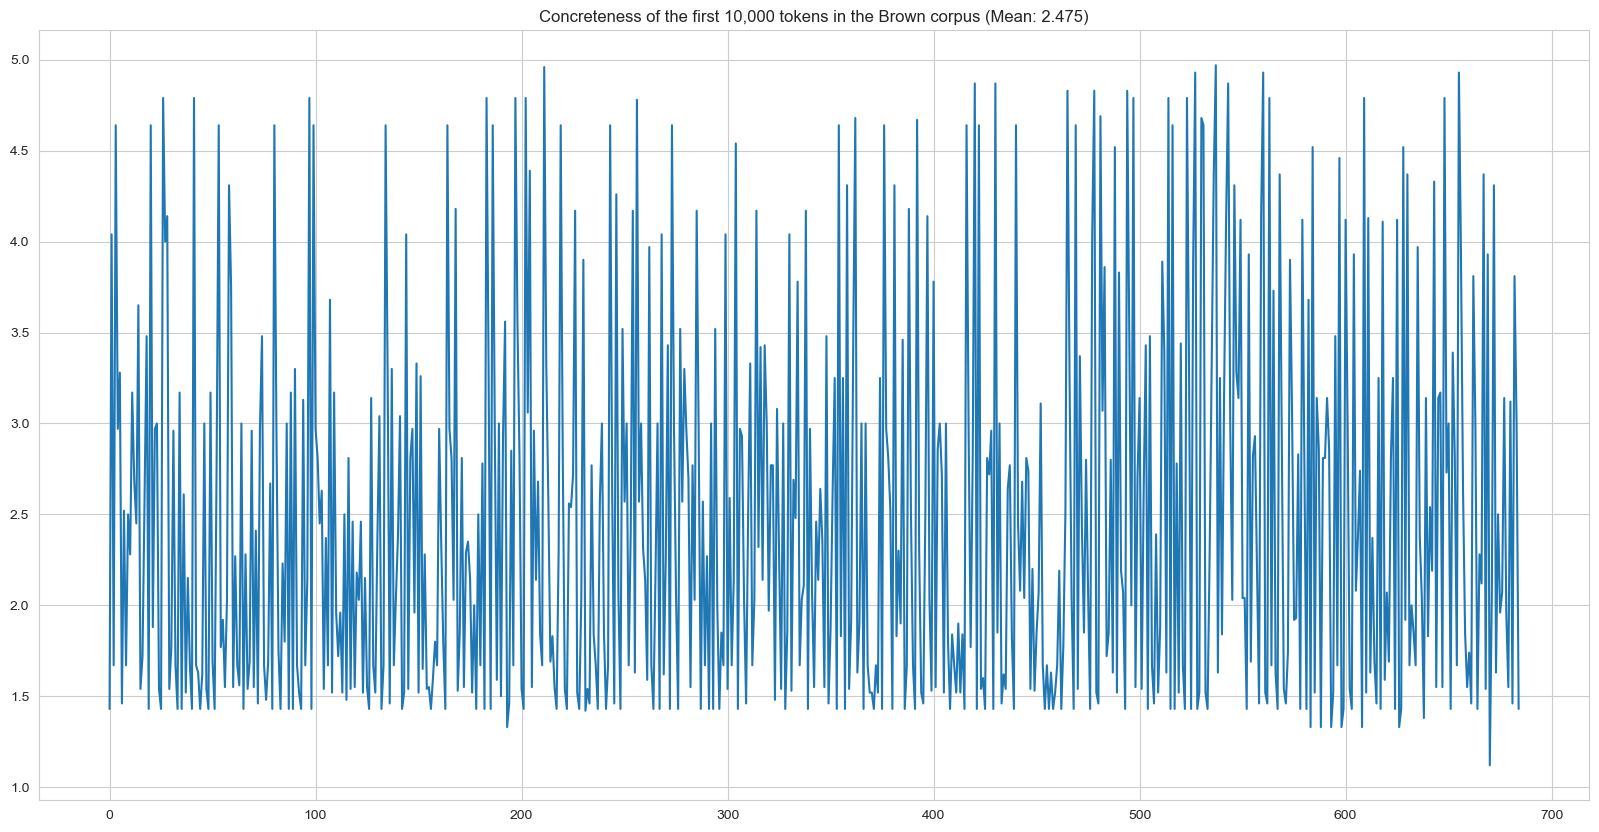

In [67]:
plt.figure(figsize=(20, 10))
plt.title(f"Concreteness of the first 10,000 tokens in the Brown corpus (Mean: {sum(listt)/len(listt):.3f})")
plt.plot(listt);

In [14]:
from typing import Sequence

def average_word_length(words: Sequence[str]) -> float:
    """Returns the average word length for a given list of words."""
    return sum([len(word) for word in words]) / len(words)

In [11]:
average_word_length(words_df)

4.5765

In [30]:
# def average_concreteness(words: Sequence[str]) -> float:
#     """Returns the average concreteness rating for a given list of words."""
#     return sum([concreteness(word) for word in words]) / len(words)

# def average_concreteness(words: Sequence[str]) -> float:
#     return sum(listt) / len(listt)

# average_concreteness(words_df)

concreteness(words_df[0])

nan